<a href="https://colab.research.google.com/github/Hoooooou-Jun/DEEEEEEPLearing_Colab/blob/main/score_distribution_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 성적 예측 (Linear Regression)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

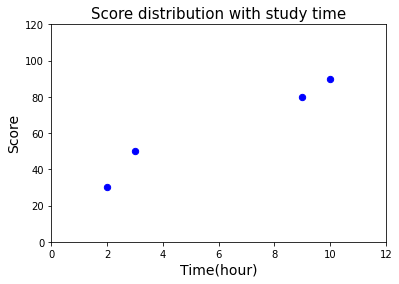

In [ ]:
# 데이터 생성 및 출력
xs = np.array([2.0, 3.0, 9.0, 10.0], dtype=float)
ys = np.array([30.0, 50.0, 80.0, 90.0], dtype=float)

plt.scatter(xs, ys, c='b', s = 40)
plt.axis([0, 12, 0, 120])
plt.xlabel('Time(hour)', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title ('Score distribution with study time', fontsize=15)
plt.show()

In [ ]:
# 모델 정의 및 추가
# 입력 1개, 출력 1개, 1 뉴론 신경망으로 정의
# 구하는 weight 파라미터 개수는 2개
model = Sequential()
model.add(Dense(1, input_shape=(1, ), activation='linear'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='sgd')

history = model.fit(xs, ys, epochs=500, verbose=0)

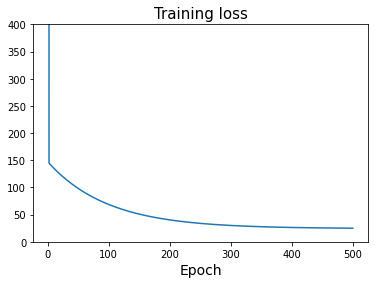

In [ ]:
# 모델 검증
# Epoch 값에 따른 MSE loss값 변화
# 모델 학습 결과 weight 벡터값
loss = history.history['loss']
epoch = range(1, len(loss) + 1)

plt.plot(epoch, loss)
plt.ylim(0, 400)
plt.xlabel('Epoch', fontsize=14)
plt.title ('Training loss', fontsize=15)
plt.show()

In [ ]:
# 6시간 공부할 때의 점수를 예측
w, b = model.weights
print(w.numpy(), b.numpy())

print(model.predict([6]))

[[6.601321]] [22.889378]
[[62.497303]]


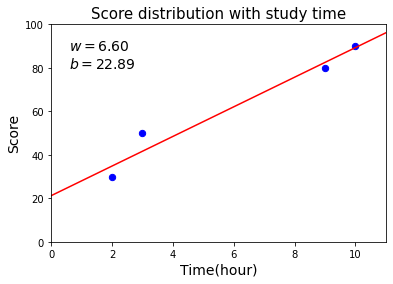

In [ ]:
x = np.array([0,11])
y = model.predict(x)
str = '\n'.join((r'$w=%.2f$' %w, r'$b=%.2f$' %b))

plt.scatter(xs, ys, c='b', s=40)
plt.plot(x, y, color='red')
plt.axis([0, 11, 0, 100])
plt.xlabel('Time(hour)', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.text(0.6, 80, str, fontsize=14)
plt.title ('Score distribution with study time', fontsize=15)
plt.show()